<a href="https://colab.research.google.com/github/Diacod-I/congenial/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.feature_names.shape

(30,)

In [ ]:
data.data.shape

(569, 30)

In [ ]:
mean_radio = data.data[:,1]
mean_radio

array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.82,
       24.04, 23.24, 17.89, 24.8 , 23.95, 22.61, 27.54, 20.13, 20.68,
       22.15, 14.36, 15.71, 12.44, 14.26, 23.04, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.59,
       21.72, 18.42, 25.2 , 20.82, 21.58, 21.35, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.24, 18.7 ,
       22.02, 18.75, 18.57, 21.59, 19.31, 11.79, 14.88, 20.98, 22.15,
       13.86, 23.84, 23.94, 21.01, 19.04, 17.33, 16.49, 21.31, 14.64,
       24.52, 15.79, 16.52, 19.65, 10.94, 16.15, 23.97, 18.  , 20.97,
       15.86, 24.91, 26.29, 15.65, 18.52, 21.46, 24.59, 21.8 , 15.24,
       24.02, 22.76, 14.76, 18.3 , 19.83, 23.03, 17.84, 19.94, 12.84,
       19.77, 24.98, 13.43, 20.52, 19.4 , 19.29, 15.56, 18.33, 18.54,
       19.67, 21.26, 16.99, 20.76, 19.65, 20.19, 15.83, 21.53, 15.76,
       16.67, 22.91, 20.01, 10.82, 17.12, 20.2 , 10.89, 16.39, 17.21,
       24.69, 18.91,

In [ ]:
print(data.target_names,'\n')
print(data.target.shape,'\n')
data.target

['malignant' 'benign'] 

(569,) 



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

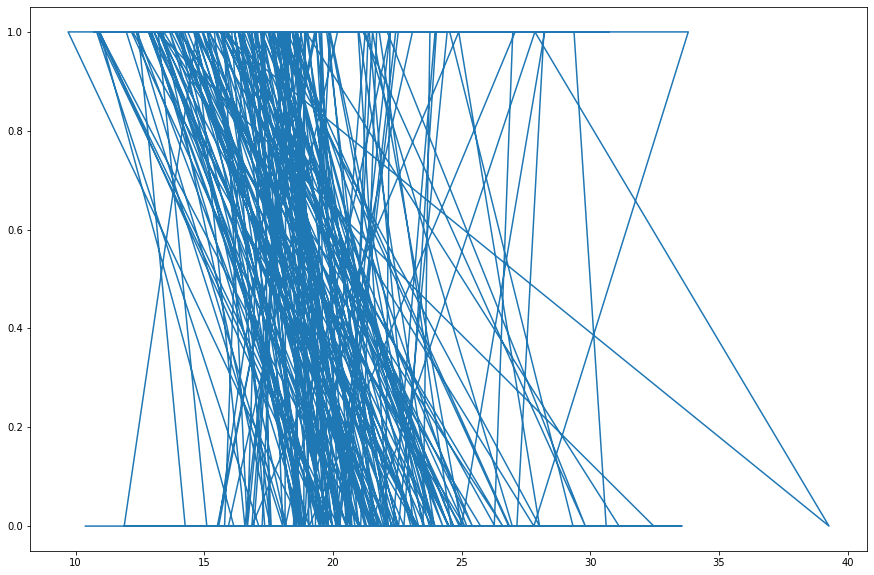

In [ ]:
plt.plot(mean_radio,data.target)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target, test_size=0.3)

In [ ]:
values,features = xtrain.shape
values,features

(398, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
xtrain[:,1]

array([-2.58309509e-01,  4.58014991e-01, -6.67637795e-01, -1.24508306e+00,
       -4.45918307e-01, -1.78841762e+00, -7.11494397e-01, -6.82256662e-01,
        6.52933222e-01,  1.45209797e+00, -3.63078058e-01, -2.02270518e-01,
        7.99121896e-01, -8.84484327e-01, -5.96979936e-01,  1.14471608e-01,
        6.21259010e-01, -3.67951014e-01,  2.13187530e+00,  1.40824137e+00,
        1.88335456e+00,  1.42529671e+00, -7.57787477e-01, -1.27432079e+00,
       -4.75156041e-01, -3.14348501e-01, -4.72719564e-01,  1.38387659e+00,
       -6.43273016e-01, -7.26113264e-01,  1.17921245e+00, -2.63182465e-01,
        6.67552090e-01, -1.28406670e+00, -6.31090626e-01,  7.69884161e-01,
        6.01767186e-01,  6.91916868e-01, -1.41563651e+00,  6.69988567e-01,
       -2.02475598e+00, -1.30355852e+00, -1.02336357e+00,  1.43016967e+00,
       -4.02061705e-01,  1.49108162e+00,  5.72529452e-01,  6.01767186e-01,
        6.26131965e-01,  1.18164892e+00, -9.23467973e-01,  2.14367202e-01,
       -2.60745987e-01, -

In [ ]:
xtest[:,1]

array([-4.82465475e-01,  1.74447532e+00,  4.55578513e-01,  2.55787326e-01,
        3.38627574e-01, -1.39858116e+00,  1.31809169e+00,  2.18060486e+00,
        1.53737470e+00, -2.16889385e-01,  1.17190301e+00, -1.31612659e-01,
        3.38627574e-01, -1.42781890e+00,  1.77820033e-01, -6.79820184e-01,
       -1.34049137e-01, -6.21344715e-01,  2.65533238e-01, -7.45605087e-01,
        3.41064052e-01, -1.01605413e+00, -9.26290125e-02,  4.96998637e-01,
        8.84398622e-01, -1.05991074e+00, -4.43481829e-01, -3.31403846e-01,
        4.53142035e-01, -1.09684358e-01, -2.70491899e-01,  2.11481996e+00,
        2.21227907e+00,  5.84711841e-01, -7.07007115e-02,  2.22202498e+00,
        3.53246442e-01,  2.17573190e+00, -7.82152256e-01,  5.40855239e-01,
        2.38731981e-01, -1.47411198e+00,  1.42773319e+00,  1.68074122e-01,
        1.19344564e-01,  5.55474107e-01, -1.22315475e+00,  2.75279149e-01,
       -1.09158495e+00,  5.60347062e-01,  7.79630073e-01,  3.57670669e+00,
        1.29090476e-01,  

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(features,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics='accuracy')

In [ ]:
bler = model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.5329 - accuracy: 0.7613 - val_loss: 0.4927 - val_accuracy: 0.8070
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.8040 - val_loss: 0.4460 - val_accuracy: 0.8421
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.8518 - val_loss: 0.4077 - val_accuracy: 0.8538
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3995 - accuracy: 0.8744 - val_loss: 0.3762 - val_accuracy: 0.8713
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3694 - accuracy: 0.9020 - val_loss: 0.3504 - val_accuracy: 0.8830
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3442 - accuracy: 0.9095 - val_loss: 0.3287 - val_accuracy: 0.9006
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3231 - accuracy: 0.9095 - val_loss: 0.3103 - val_accuracy: 0.9006
Epoch 8/100


In [ ]:
print("Training Score:",model.evaluate(xtrain,ytrain))
print("Test Score:",model.evaluate(xtest,ytest))

13/13 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9799
Training Score: [0.09176706522703171, 0.979899525642395]
6/6 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9708
Test Score: [0.074501171708107, 0.9707602262496948]


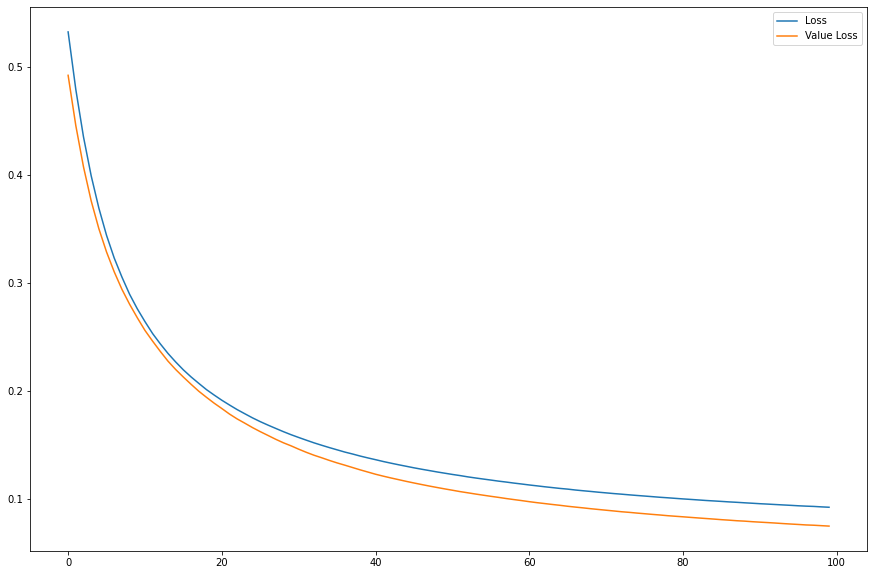

In [ ]:
plt.plot(bler.history['loss'],label='Loss')
plt.plot(bler.history['val_loss'],label='Value Loss')
plt.legend()

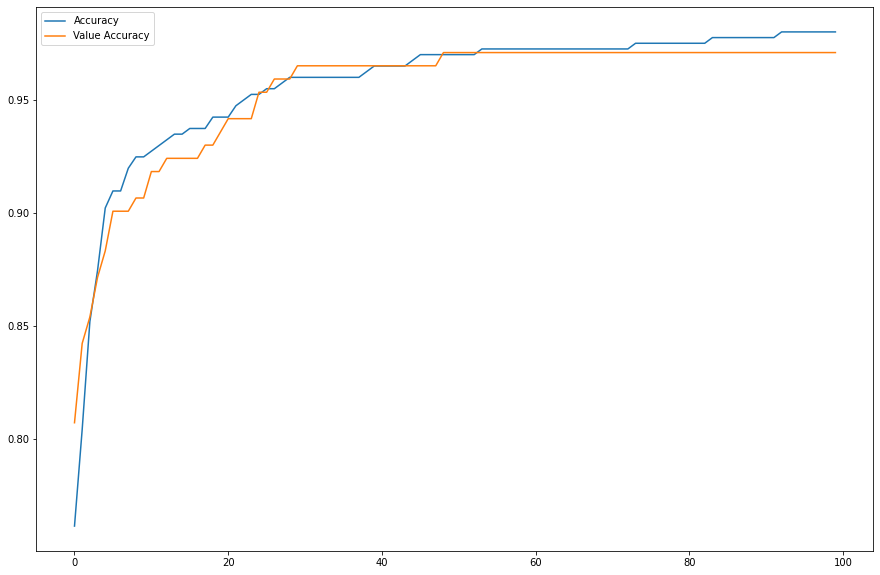

In [ ]:
plt.plot(bler.history['accuracy'],label='Accuracy')
plt.plot(bler.history['val_accuracy'],label='Value Accuracy')
plt.legend()